In [13]:
# Import the necessary libraries 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import display, Image
from PIL import Image

cv2.imread reads images in BGR format by default.If you want to work with RGB format, you may need to convert the image using cv2.cvtColor: img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [2]:
# Load the image 
image = cv2.imread('brownspot.jpg')

In [5]:
image_path = 'brownspot.jpg'
img = Image.open(image_path)
print("Image format:", img.format)

Image format: JPEG


In [6]:
img = cv2.imread(image_path)
print("Image format:", img.shape)

Image format: (300, 300, 3)


In [7]:
if len(img.shape) == 2:
    print("Grayscale image")
elif len(img.shape) == 3 and img.shape[2] == 1:
    print("Binary image")
else:
    print("Color image")

Color image


In [8]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
# import numpy as np
# from PIL import Image

def rgb_to_gray(rgb_image):
    # Apply the conversion equation to each pixel
    gray_image = np.dot(rgb_image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    return gray_image

# Load the RGB image using Pillow
rgb_image_path = "brownspot.jpg"
rgb_image = np.array(Image.open(rgb_image_path))

# Convert RGB to grayscale using the specified equation
gray_image = rgb_to_gray(rgb_image)

# Save or display the grayscale image
# Image.fromarray(gray_image).save("output_gray_image.jpg")
Image.fromarray(gray_image).show()


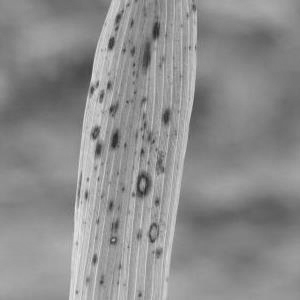

In [12]:
# Display the grayscale image in the notebook
display(Image.fromarray(gray_image))

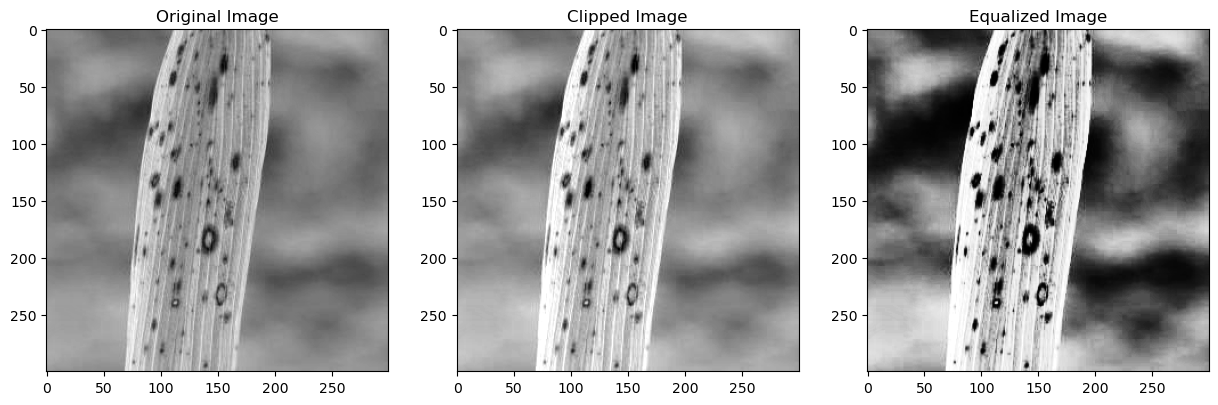

In [25]:
# Clip extreme values
min_value = 50
max_value = 200
clipped_image = np.clip(gray_image, min_value, max_value)

# Apply histogram equalization to enhance contrast
equalized_image = cv2.equalizeHist(clipped_image)

# Display the original, clipped, and equalized images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(clipped_image, cmap='gray')
plt.title('Clipped Image')

plt.subplot(1, 3, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()

In [16]:
def histogram_equalization(gray_image):
    # Calculate histogram
    hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize CDF to the range [0, 255]
    cdf_normalized = (cdf * 255 / cdf[-1]).astype(np.uint8)

    # Apply histogram equalization using the CDF
    equalized_image = cdf_normalized[gray_image]
    
    # Calculate histogram of the equalized image
    equalized_hist, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])

    return equalized_image, hist, cdf_normalized, equalized_hist

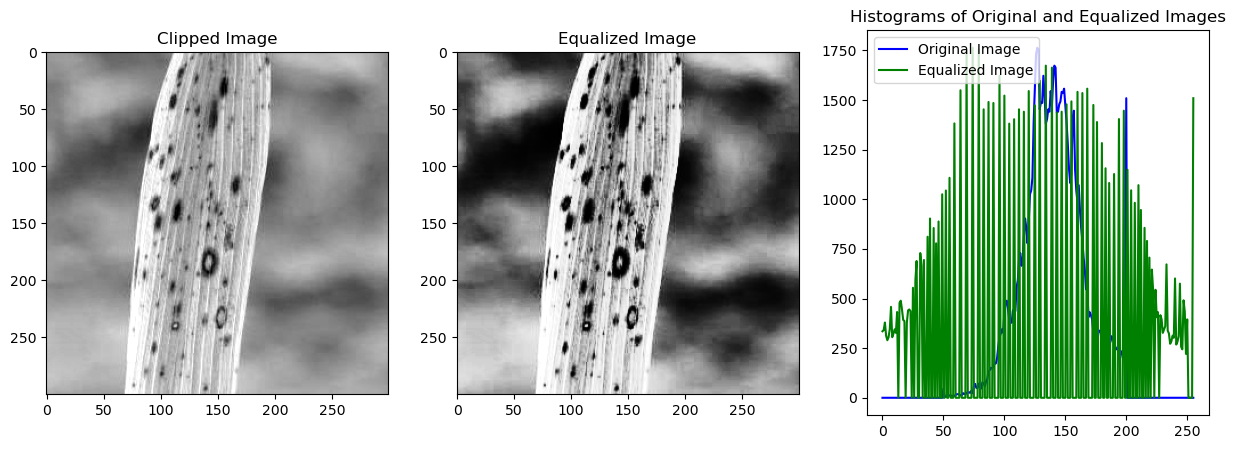

In [27]:
# Apply histogram equalization
equalized_image, hist, cdf, equalized_hist = histogram_equalization(clipped_image)

# Display original and equalized images side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(clipped_image, cmap='gray')
plt.title('Clipped Image')

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

# Display histogram of the original image
plt.subplot(1, 3, 3)
plt.plot(hist, color='blue', label='Clipped Image')
plt.plot(equalized_hist, color='green', label='Equalized Image')
plt.title('Histograms of Original and Equalized Images')
plt.legend()

plt.show()

Otsu's method is a popular technique for automatic thresholding, which determines an optimal threshold value to separate an image into two classes (foreground and background).

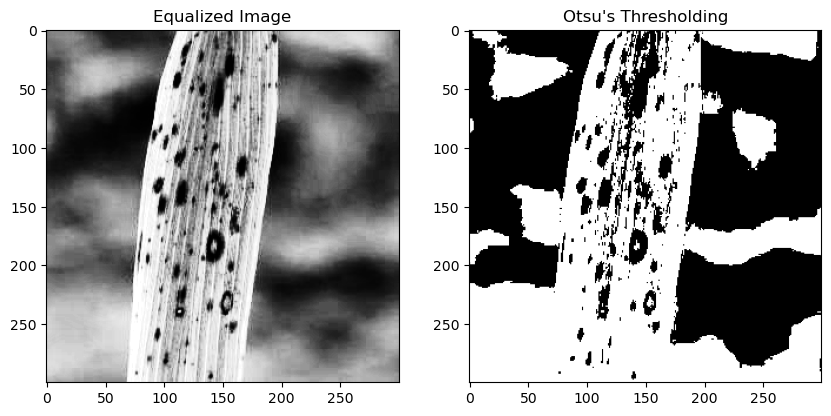

Otsu's Threshold: (125.0,)


In [28]:
# Apply Otsu's thresholding
_, thresholded_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original image and the thresholded image side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Otsu\'s Thresholding')

plt.show()

# Print the calculated threshold value
print(f"Otsu's Threshold: {_,}")


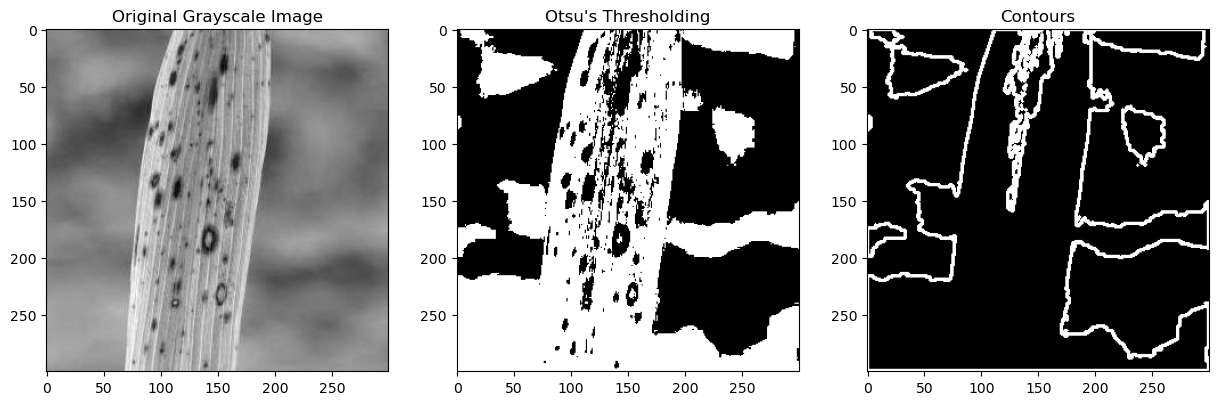

In [29]:
# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an image to draw contours
contour_image = np.zeros_like(gray_image)

# Draw contours on the contour image
cv2.drawContours(contour_image, contours, -1, (255), thickness=2)

# Display the original, thresholded, and contour images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 3, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Otsu\'s Thresholding')

plt.subplot(1, 3, 3)
plt.imshow(contour_image, cmap='gray')
plt.title('Contours')

plt.show()
